# Customer Lifetime Value Prediction

Customer Lifetime Value (CLV) คือ "มูลค่าของลูกค้าระยะยาว" แปลง่ายๆ คือ ลูกค้าจะซื้อสินค้ากับเราเป็นจำนวนเงินเท่าไหร่จนกว่าเขาจะเลิกซื้อสินค้ากับเรา ซึ่งในการทำธุรกิจนั้นการรู้ CLV ของลูกค้าแต่ละคนนั้นถือว่ามีความสำคัญมาก เพราะช่วยให้เราสามารถประมาณยอดขายและกำไรที่จะเกิดในอนาคตได้ โดยสามารถคำนวนได้ตามสูตคือ

LTV = Avg Purchases x Retention Period

ยกตัวอย่าง เช่น ลูกค้าของเราโดยเฉลี่ยแล้วใช้จ่ายอยู่ที่ 2,000 บาทต่อคำสั่งซื้อ และมีช่วงอายุหรือ Lifetime ประมาณ 6 เดือน จนไม่ซื้อสินค้ากับเราอีก สูตรการคำนวณง่ายๆ คือ 2,000 x 6 = 12,000 บาท นั่นเอง 

ซึ่งเมื่อเรารู้ CLV ก็จะช่วยให้เราวางแผนค่าใช้จ่ายในการหาลูกค้าใหม่ได้ง่ายขึ้น เช่น หาก CLV ของเราอยู่ที่ 12,000 บาท เราก็ไม่ควรจะใช้เงินใหนการหาลูกค้าใหม่ (Customer Acquisition Cost : CAC) มากเกินกว่า CLV แต่โดยหลักการแล้ว CLV:CAC อยู่ที่ 3:1 นั่นคือ เราไม่ควรใช้เงินเกิน 1 ใน 3 ของ CLV ลูกค้าใหม่ จากตัวอย่างคือ ไม่ควรเกิน 4,000 บาท

Ref:\
https://www.propellercrm.com/blog/customer-acquisition-cost \
https://www.demandjump.com/blog/customer-acquisition-cost-by-industry \
https://firstpagesage.com/seo-blog/the-saas-ltv-to-cac-ratio-fc/ 

### พฤติกรรมของลูกค้าที่มีความซับซ้อนมากขึ้น
ปัญหาส่วนใหญ่ที่ทำให้การคำนวน CLV คือ
1. ลูกค้าแต่ละคนมีพฤติกรรมการสั่งซื้อที่ไม่เหมือนกัน ส่งผลให้ CLV ของแต่ละคนแตกต่างกัน
2. CLV เป็นการพยากรณ์มูลค่าของลูกค้าในอนาคต แต่องค์กรส่วนใหญ่จะใช้ข้อมูลในอดีตเพื่อหา CLV เช่น Total Spend
3. ลูกค้าอาจจะหยุดซื้อหรือกลับมาซื้อเมื่อไหร่ก็ได้
4. อัตราเงินฟ้อในอนาคตอาจจะมีผลกระทบต่อ CLV ได้ เช่น 100 บาทในอนาคตอาจมีค่าน้อยกว่า 100 บาทวันนี้

### Customer Predictive Analytics
จากปัญหาในการคำนวน CLV นั้นเราสามารถใช้ Python เพื่อคำนวณหา CLV ของลูกค้าในอนาคตได้ โดย Package ที่จะใช้ในวันนี้คือ lifetimes ครับ

## Step 1: Setup the Environment

In [129]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

In [130]:
import lifetimes

In [247]:
# schema of the excel spreadsheet data range
orders_schema = {
  'InvoiceNo':np.str,
  'StockCode':np.str,
  'Description':np.str,
  'Quantity':np.int64,
  'UnitPrice':np.float64,
  'CustomerID':np.str,
  'Country':np.str  
  }

# Loading the data
data = pd.read_csv('data.csv', encoding="unicode_escape", parse_dates=['InvoiceDate'], dtype=orders_schema)
print("จำนวนข้อมูลทั้งหมด: "+ str(data.shape[0]))
data.head(5)

จำนวนข้อมูลทั้งหมด: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Step 2: Explore the Dataset

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### คำอธิบายข้อมูล
* **InvoiceNo**: เลขที่ใบสั่งซื้อสินค้า ถ้าขึ้นต้นด้วย c คือเป็นรายการที่ยกลิก
* **StockCode**: รหัสสินค้า
* **Description**: ชื่อสินค้า
* **Quantity**: จำนวนสินค้าที่สั่งซื้อในรายการนั้น
* **InvoiceDate**: วันที่สั่งซื้อสินค้า
* **UnitPrice**: ราคาสินค้าที่สั่งซื้อ
* **CustomerID**: รหัสลูกค้า
* **Country**: ประเทศที่ทำการสั่งซื้อ

In [248]:
print('ข้อมูลการสั่งซื้อตั้งแต่วันที่ {} ถึงวันที่ {} '.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print('มีรายการทั้งหมด {} record '.format(df.shape[0]))

ข้อมูลการสั่งซื้อตั้งแต่วันที่ 2010-12-01 08:26:00 ถึงวันที่ 2011-12-09 12:50:00 
มีรายการทั้งหมด 541909 record 


### คำนวนยอดขาย
เราสามารถคำนวนยอดขายได้โดยใช้สูตร จำนวนที่สั่งซื้อ x ราคา

In [249]:
# calculate sales amount as quantity * unit price
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


### สร้างรายงานยอดขาย
เทคนิคต่อไปคือการทำรายงานในรูปแบบ Timeseries โดยใช้วันที่มาสร้างเป็น Index และใช้คำสั่ง Resample ในการกำหนดรูปแบบของการแสดงผล โดยเราจะเลือกมาเฉพาะข้อมูลที่จำเป็นในการหายอดขาย

In [135]:
# Feature selection
features = ['CustomerID', 'Country', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice','Revenue']

In [136]:
# สร้าง dataframe ใหม่โดยใช้ InvoiceDate เป็น Index
data = df[features].set_index('InvoiceDate')

Text(0.5, 1.0, 'Daily Revenue')

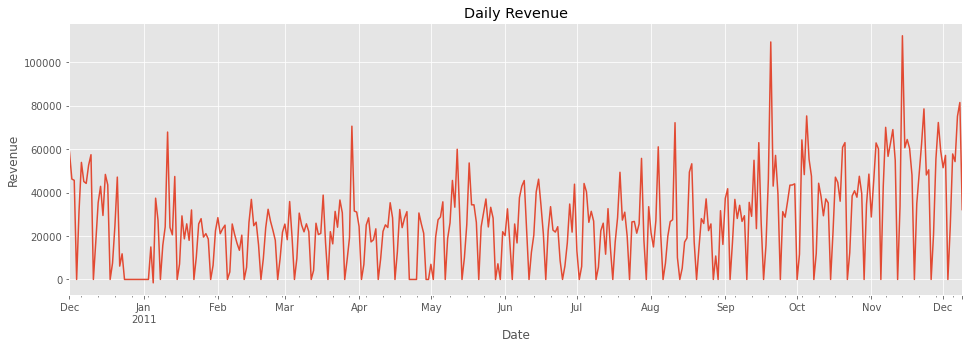

In [137]:
plt.figure(figsize = (16,5))

data.resample('D').Revenue.sum().plot()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue')

Text(0.5, 1.0, 'Weekly Revenue')

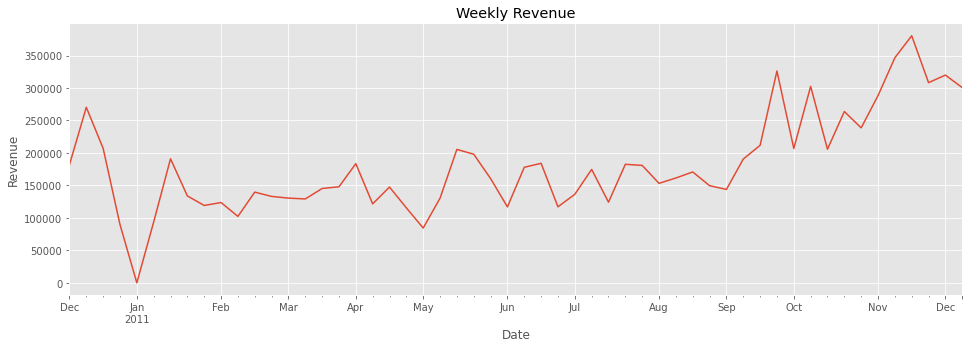

In [138]:
plt.figure(figsize = (16,5))

data.resample('W').Revenue.sum().plot()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Weekly Revenue')

Text(0.5, 1.0, 'Monthly Revenue')

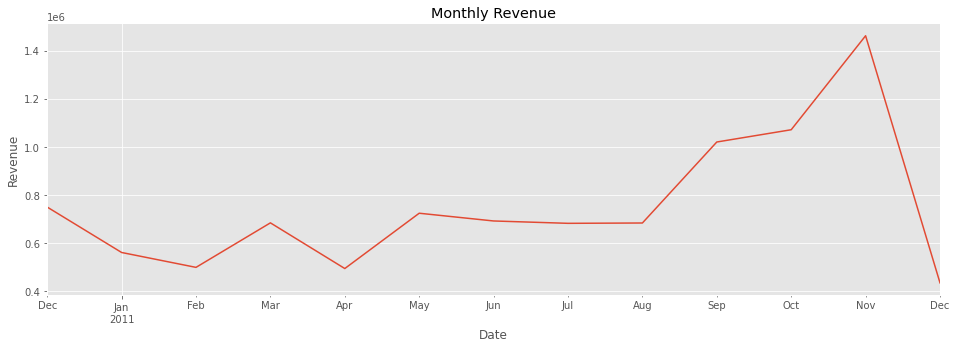

In [139]:
plt.figure(figsize = (16,5))

data.resample('M').Revenue.sum().plot()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

Text(0.5, 1.0, 'Quarterly Revenue')

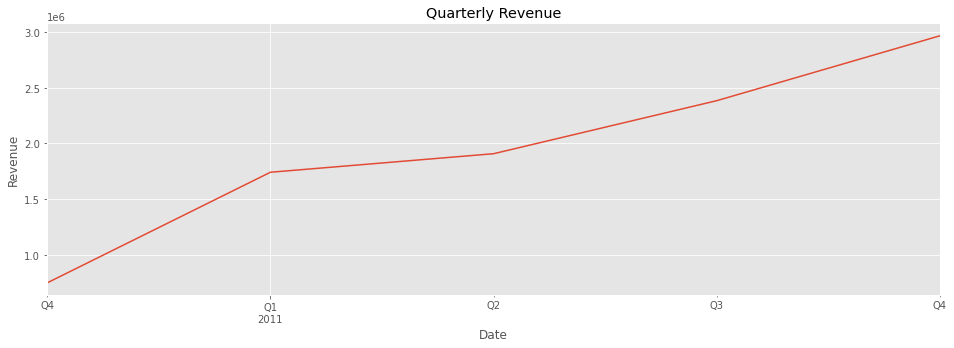

In [140]:
plt.figure(figsize = (16,5))

data.resample('Q').Revenue.sum().plot()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Quarterly Revenue')

Text(0.5, 1.0, 'Yearly Revenue')

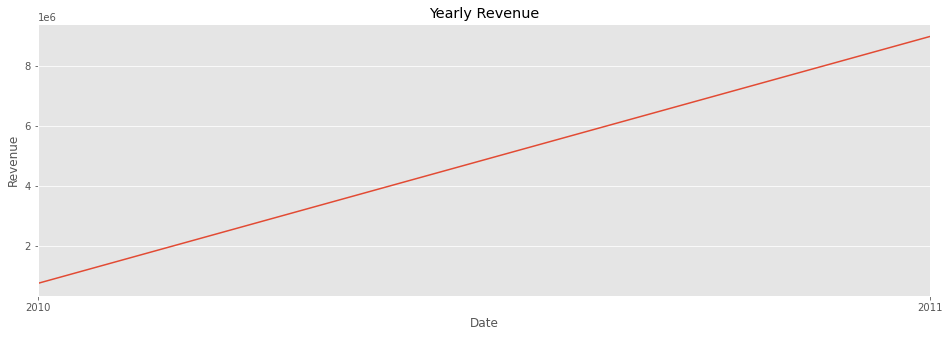

In [141]:
plt.figure(figsize = (16,5))

data.resample('Y').Revenue.sum().plot()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Yearly Revenue')

### สร้างรายงานคำสั่งซื้อ

Text(0.5, 1.0, 'Daily Unique orders')

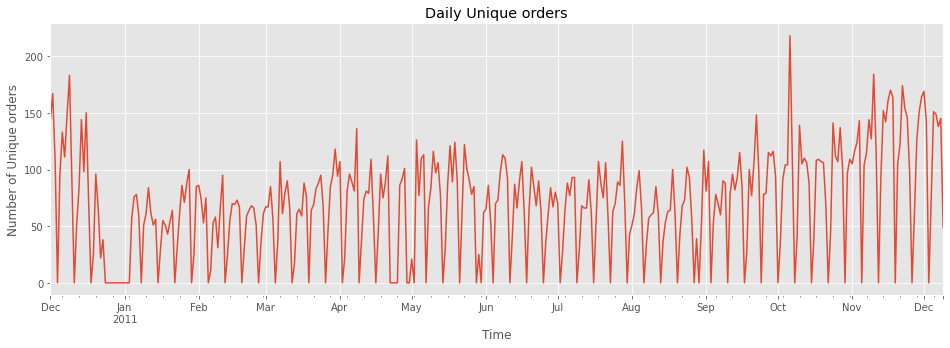

In [142]:
plt.figure(figsize = (16,5))

# จำนวนคำสั่งซือรายวัน
data.resample('D').InvoiceNo.nunique().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Number of Unique orders')
plt.title('Daily Unique orders')

Text(0.5, 1.0, 'Weekly Unique orders')

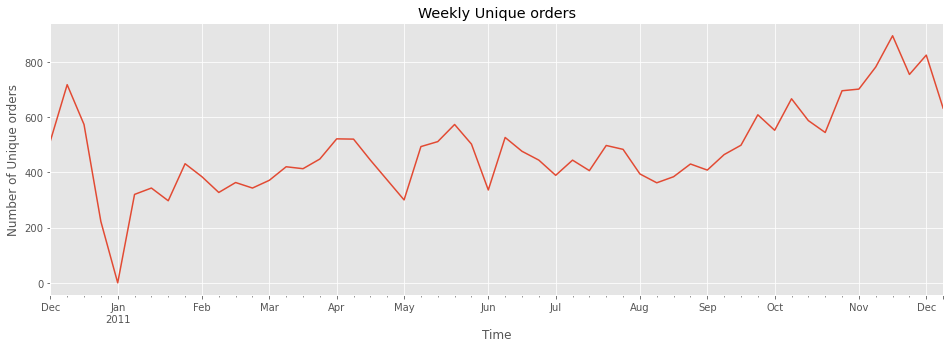

In [143]:
plt.figure(figsize = (16,5))

# จำนวนคำสั่งซือรายสัปดาห์
data.resample('W').InvoiceNo.nunique().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Number of Unique orders')
plt.title('Weekly Unique orders')

Text(0.5, 1.0, 'Monthly Unique orders')

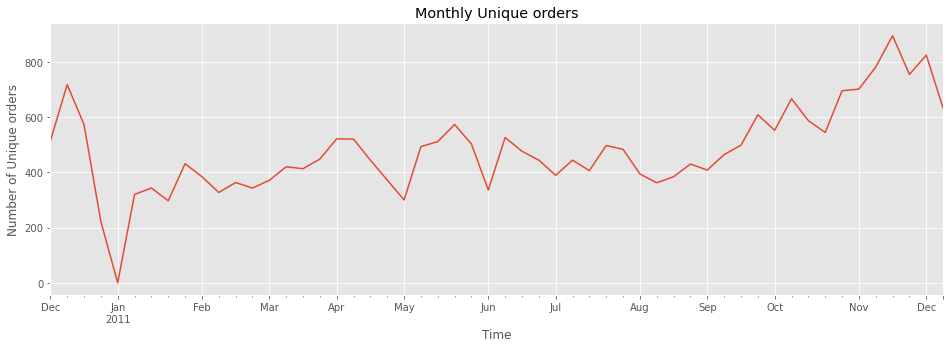

In [144]:
plt.figure(figsize = (16,5))

# จำนวนคำสั่งซือรายเดือน
data.resample('W').InvoiceNo.nunique().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Number of Unique orders')
plt.title('Monthly Unique orders')

Text(0.5, 1.0, 'Hourly Purchases')

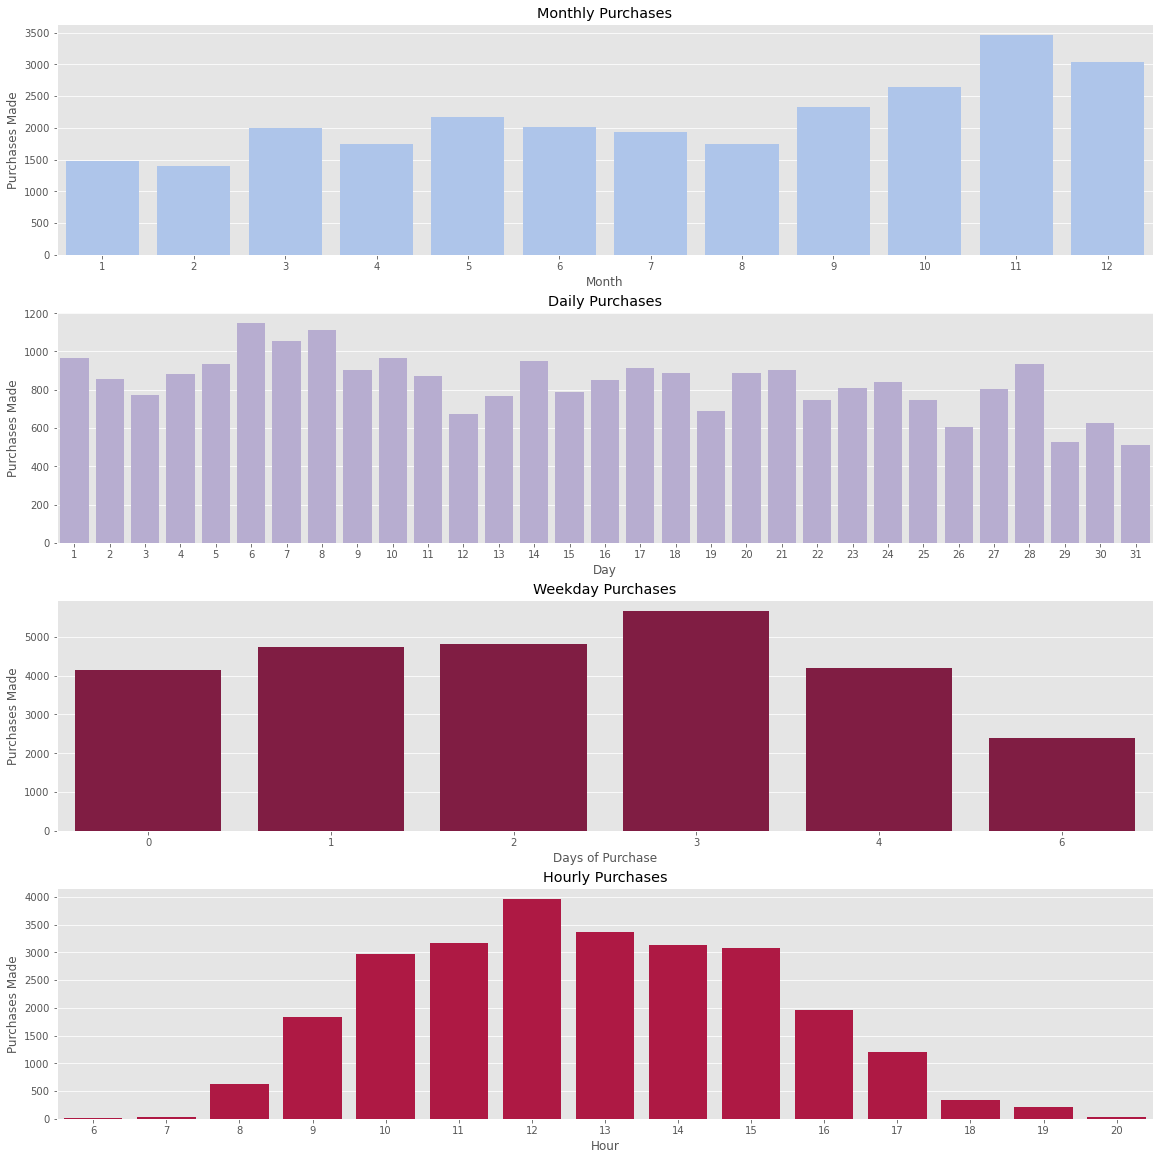

In [145]:
# วิเคราะห์ข้อมูลยอดขายราย
fig, ax = plt.subplots(4,1, constrained_layout = True, figsize=(16,16))
sns.countplot(x='InvoiceDate', data=pd.DataFrame(df[['InvoiceNo','InvoiceDate']].drop_duplicates().InvoiceDate.dt.month), color ='#a4c2f4', ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Purchases Made')
ax[0].set_title('Monthly Purchases')

sns.countplot(x='InvoiceDate', data=pd.DataFrame(df[['InvoiceNo','InvoiceDate']].drop_duplicates().InvoiceDate.dt.day), color ='#b4a7d6', ax=ax[1])
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Purchases Made')
ax[1].set_title('Daily Purchases')

# Monday=0, Sunday=6
sns.countplot(x='InvoiceDate', data=pd.DataFrame(df[['InvoiceNo','InvoiceDate']].drop_duplicates().InvoiceDate.dt.dayofweek), color ='#900c3f', ax=ax[2])
ax[2].set_xlabel('Days of Purchase')
ax[2].set_ylabel('Purchases Made')
ax[2].set_title('Weekday Purchases')

sns.countplot(x='InvoiceDate', data=pd.DataFrame(df[['InvoiceNo','InvoiceDate']].drop_duplicates().InvoiceDate.dt.hour), color ='#c70039', ax=ax[3])
ax[3].set_xlabel('Hour')
ax[3].set_ylabel('Purchases Made')
ax[3].set_title('Hourly Purchases')

### วิเคราะห์ข้อมูล
1. ยอดขายในเดือน 11 และ 12 ค่อนข้างดี
2. คำสั่งซื้อจะเยอะในช่วงต้นเดือน โดยเฉพาะวันที่ 6,7,8
3. ไม่มีคำสั่งซื้อในวันเสาร์ (Monday=0, Sunday=6)
4. ช่วงเวลาที่สั่งซื้อ เป็นช่วง 8.00 - 18.00 อาจจะเป็นการค้าขายแบบ B2B (Business to Business)

## Step 3: Data Cleansing
ในขั้นตอนนี้เราจะมาทำความสะอาดข้อมูล ทำการ Clean ข้อมูลที่ไม่จำเป็นออกไป

In [146]:
data.describe()

,CustomerID,Quantity,UnitPrice,Revenue
count,"406,829.00","541,909.00","541,909.00","541,909.00"
mean,"15,287.69",9.55,4.61,17.99
std,"1,713.60",218.08,96.76,378.81
min,"12,346.00","-80,995.00","-11,062.06","-168,469.60"
25%,"13,953.00",1.00,1.25,3.40
50%,"15,152.00",3.00,2.08,9.75
75%,"16,791.00",10.00,4.13,17.40
max,"18,287.00","80,995.00","38,970.00","168,469.60"


จะเห็นว่ามีบางรายการที่มียอดสั่งซื้อติดลบ ซึ่งในการหา CLV นั้นโดยปกติเราจะไม่สนใจการคืนสินค้า ให้ทำการกรองข้อมูลยอดขายติดลบออกไปก่อน

In [147]:
data = data.loc[data['Revenue'] > 0]
data.describe()

,CustomerID,Quantity,UnitPrice,Revenue
count,"397,884.00","530,104.00","530,104.00","530,104.00"
mean,"15,294.42",10.54,3.91,20.12
std,"1,713.14",155.52,35.92,270.36
min,"12,346.00",1.00,0.00,0.00
25%,"13,969.00",1.00,1.25,3.75
50%,"15,159.00",3.00,2.08,9.90
75%,"16,795.00",10.00,4.13,17.70
max,"18,287.00","80,995.00","13,541.33","168,469.60"


<AxesSubplot:>

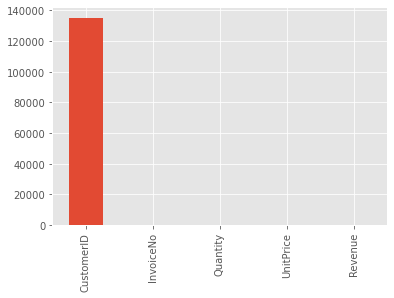

In [122]:
# ตรวจสอบข้อมูล null
data.isnull().sum().plot(kind='bar')

In [123]:
pd.DataFrame(zip(data.isnull().sum(), data.isnull().sum()/len(data)), 
             columns=['Count', 'Proportion'], 
             index=data.columns)

,Count,Proportion
CustomerID,135080,0.25
InvoiceNo,0,0.00
Quantity,0,0.00
UnitPrice,0,0.00
Revenue,0,0.00


จากข้อมูลจะเห็นว่ามีข้อมูลที่ไม่มีรหัสลูกค้าเกือบ 25% ของคำสั่งซื้อสินค้าทั้งหมด และในการหา CLV นั้นเราสนใจเฉพาะข้อมูลลูกค้าที่เราสามารถระบุตัวตนได้ เราก็ต้องทำการ drop ข้อมูลที่เป็น null ออกไป

In [149]:
data.dropna(subset=['CustomerID'], inplace=True)
pd.DataFrame(zip(data.isnull().sum(), data.isnull().sum()/len(data)), 
             columns=['Count', 'Proportion'], index=data.columns)

,Count,Proportion
CustomerID,0,0.00
InvoiceNo,0,0.00
Quantity,0,0.00
UnitPrice,0,0.00
Revenue,0,0.00


In [155]:
# Convert to int for customer ID
data['CustomerID'] = data.CustomerID.astype(int).astype(str)

In [156]:
data.reset_index(inplace=True)
data.head()

,InvoiceDate,CustomerID,InvoiceNo,Quantity,UnitPrice,Revenue
0,2010-12-01 08:26:00,17850,536365,6,2.55,15.30
1,2010-12-01 08:26:00,17850,536365,6,3.39,20.34
2,2010-12-01 08:26:00,17850,536365,8,2.75,22.00
3,2010-12-01 08:26:00,17850,536365,6,3.39,20.34
4,2010-12-01 08:26:00,17850,536365,6,3.39,20.34


In [198]:
# Printing the details of the dataset
maxdate = data['InvoiceDate'].dt.date.max()
mindate = data['InvoiceDate'].dt.date.min()
unique_cust = data['CustomerID'].nunique()
tot_quantity = data['Quantity'].sum()
tot_revenue = data['Revenue'].sum()
days_in_period = maxdate - mindate


print('รายการสินค้าตั้งแต่ {} จนถึง {}'.format(mindate, maxdate))
print('จำนวนลูกค้าที่มีรหัสลูกค้า {} '.format(unique_cust))
print('จำนวนสินค้าที่ขายได้ {} '.format(tot_quantity))
print('ยอดขายทั้งหมด {} '.format(tot_revenue))
print("ระยะเวลาของข้อมูล {} วัน".format(days_in_period.days))

รายการสินค้าตั้งแต่ 2010-12-01 จนถึง 2011-12-09
จำนวนลูกค้าที่มีรหัสลูกค้า 4338 
จำนวนสินค้าที่ขายได้ 5167812 
ยอดขายทั้งหมด 8911407.904 
ระยะเวลาของข้อมูล 373


## Step 4: Customer Lifetime Value Calculation

### 4.1 Average revenue per user (ARPU) 

ARPU = Total Revenue / Number of customers

In [199]:
ARPU = tot_revenue/unique_cust

calculate per-day value of each customer if customer made purchase before dataset mid-point

In [223]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [234]:
from pyspark.sql.functions import to_date, datediff, max, min, countDistinct, count, sum, when
from pyspark.sql.types import *

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [257]:
# convert pandas DF to Spark DF

schema = StructType([ \
    StructField("InvoiceNo",StringType(),True), \
    StructField("StockCode",StringType(),True), \
    StructField("Description",StringType(),True), \
    StructField("Quantity", IntegerType(), True), \
    StructField("InvoiceDate", DateType(), True), \
    StructField("UnitPrice", FloatType(), True), \
    StructField("CustomerID", StringType(), True), \
    StructField("Country", StringType(), True), \
    StructField("Revenue", FloatType(), True) \
  ])


orders = spark.createDataFrame(df, schema=schema)

In [258]:
orders.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: date (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Revenue: float (nullable = true)



In [259]:
orders.show(10)

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|Revenue|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|   17850.0|United Kingdom|   15.3|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|   17850.0|United Kingdom|  20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|   17850.0|United Kingdom|   22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|   17850.0|United Kingdom|  20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|   17850.0|United Kingdom|  20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|   17850.0|United Kingdom|   15.3|
|   536365|    21730|GLASS S

In [262]:
# present Spark DF as queriable view
orders.createOrReplaceTempView('orders') 

In [264]:
!pip install sparksql-magic

     |████████████████████████████████| 198 kB 1.7 MB/s eta 0:00:01


In [266]:
%load_ext sparksql_magic

In [269]:
%%sparksql
SELECT 
  MIN(TO_DATE(InvoiceDate)) as period_start,
  MAX(TO_DATE(InvoiceDate)) as period_end,
  DATEDIFF( MAX(TO_DATE(InvoiceDate)), MIN(TO_DATE(InvoiceDate))) as days_in_period
FROM orders

period_start,period_end,days_in_period
2010-12-01,2011-12-09,373


In [270]:
%%sparksql
SELECT
  a.CustomerID,
  MIN(TO_DATE(a.InvoiceDate)) as first_at,
  MAX(DATEDIFF(b.current_date, TO_DATE(a.InvoiceDate))) as T
FROM orders a
CROSS JOIN (
  SELECT MAX(TO_DATE(InvoiceDate)) as current_date FROM orders
  ) b
WHERE a.CustomerID IS NOT NULL
GROUP BY a.CustomerID
ORDER BY CustomerID

only showing top 20 row(s)


CustomerID,first_at,T
12346.0,2011-01-18,325
12347.0,2010-12-07,367
12348.0,2010-12-16,358
12349.0,2011-11-21,18
12350.0,2011-02-02,310
12352.0,2011-02-16,296
12353.0,2011-05-19,204
12354.0,2011-04-21,232
12355.0,2011-05-09,214
12356.0,2011-01-18,325


In [287]:
%%sparksql
SELECT
  x.*,
  (x.monetary_value/ x.T) as value_per_day,
  30*(x.monetary_value/ x.T) as value_per_month,
  365*(x.monetary_value/ x.T) as value_per_year
FROM (
  SELECT
    a.CustomerID,
    MIN(TO_DATE(a.InvoiceDate)) as first_at,
    b.midpoint_date,
    SUM(a.Revenue) as monetary_value,
    MAX(DATEDIFF(b.current_date, TO_DATE(a.InvoiceDate))) as T
  FROM orders a
  CROSS JOIN ( 
    SELECT
    MAX(TO_DATE(InvoiceDate)) as current_date, 
    DATE_ADD(
        MIN(TO_DATE(InvoiceDate)),
        cast(CEILING(DATEDIFF(MAX(TO_DATE(InvoiceDate)), MIN(TO_DATE(InvoiceDate)))/2) as int)  
    ) as midpoint_date 
    FROM orders
  ) b
WHERE a.CustomerID IS NOT NULL
GROUP BY a.CustomerID, b.midpoint_date
HAVING first_at < b.midpoint_date
) x
ORDER BY CustomerID

only showing top 20 row(s)


CustomerID,first_at,midpoint_date,monetary_value,T,value_per_day,value_per_month,value_per_year
12346.0,2011-01-18,2011-06-06,0.0,325,0.0,0.0,0.0
12347.0,2010-12-07,2011-06-06,4309.999982833862,367,11.743869163035047,352.3160748910514,4286.512244507792
12348.0,2010-12-16,2011-06-06,1797.239990234375,358,5.020223436408869,150.60670309226606,1832.381554289237
12350.0,2011-02-02,2011-06-06,334.4000005722046,310,1.078709679265176,32.36129037795528,393.7290329317893
12352.0,2011-02-16,2011-06-06,1545.409993171692,296,5.220979706661121,156.62939119983363,1905.6575929313094
12353.0,2011-05-19,2011-06-06,89.0,204,0.4362745098039216,13.088235294117647,159.24019607843138
12354.0,2011-04-21,2011-06-06,1079.4000082015991,232,4.652586242248272,139.57758726744817,1698.1939784206195
12355.0,2011-05-09,2011-06-06,459.3999996185303,214,2.146728970180048,64.40186910540143,783.5560741157175
12356.0,2011-01-18,2011-06-06,2811.430000782013,325,8.65055384856004,259.5166154568012,3157.452154724415
12359.0,2011-01-12,2011-06-06,6245.5299916267395,331,18.868670669567187,566.0601200870157,6887.064794392023


### 4.1 การหา CLV แบบใช้ข้อมูล Average
เป็นวิธีที่นิยมใช้เพราะสามารถคำนวณได้ง่าย โดยใช้ข้อมูล Average ได้เลย

https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value

#### สูตรในการหา CLV
**CLV = ((Avg Purchases Value X Avg Purchase Frequency) X Avg Customer Lifespan)**

* CLV : Customer Lifetime Value
* Avg Purchases : ยอดคำสั่งซื้อเฉลี่ย (ยอดขายทั้งหมด / จำนวนคำสั่งซือทั้งหมด)
* Purchase Frequency : ความถี่ในการซื้อโดยเฉลี่ย (จำนวนคำสั่งซือทั้งหมด / จำนวนลูกค้าทั้งหมด)
* Avg Customer Lifespan : ระยะเวลาที่ลูกค้าเป็นลูกค้าของเรา (ผลรวมของระยะเวลาที่ลูกค้าซื้อสินค้า / จำนวนลูกค้า) 

*หมายเหตุ หากเราสามารถหา Profit Margin ได้ให้ใช้ค่านั้นเลย และหากเรารู้ Discount Rate หรืออัตราเงินเฟ้านำมาใช้ได้*\
**CLV = ((Average Sales X Purchase Frequency) / Churn) X Profit Margin**
* Retention rate = อัตราการกลับมาซื่อซ่ำ ( จำนวนลูกค้าที่สั่งซื้อมากกว่า 1 รายการ / จำนวนลูกค้าทั้งหมด)
* Churn = อัตราการหยุดใช้บริการ (1 - Retention Rate)
* Profit Margin 

In [160]:
def age(x):
    return (x.max() - x.min()).days

def purchase_frequency(x):
    return (x.max() - x.min()).days / x.count()

def date(x):
    return x.date

In [200]:
# Transforming the data to customer level for the analysis
customer = data.groupby('CustomerID').agg({'InvoiceDate': [max, age, purchase_frequency],
                                           'InvoiceNo': 'nunique',
                                           'Revenue': lambda x: sum(x)})

#customer.columns = ['Age', 'purchase_frequency', 'Purchases', 'monetary_value']
customer.head()

InvoiceDate                         InvoiceNo   Revenue
                           max  age purchase_frequency   nunique  <lambda>
CustomerID                                                                
12346      2011-01-18 10:01:00    0               0.00         1 77,183.60
12347      2011-12-07 15:52:00  365               2.01         7  4,310.00
12348      2011-09-25 13:13:00  282               9.10         4  1,797.24
12349      2011-11-21 09:51:00    0               0.00         1  1,757.55
12350      2011-02-02 16:01:00    0               0.00         1    334.40

In [189]:
# Avg Purchases : ยอดคำสั่งซื้อเฉลี่ย (ยอดขายทั้งหมด / จำนวนคำสั่งซือทั้งหมด)
Average_sales = round(np.mean(customer['TotalRevenue']),2)
print('ยอดคำสั่งซื้อเฉลี่ย {} '.format(Average_sales))

# Purchase Frequency = ความถี่ในการซื้อสินค้า (จำนวนคำสั่งซือทั้งหมด / จำนวนลูกค้าทั้งหมด)
Purchase_freq = np.mean(customer['purchase_frequency'])
print('ความถี่ในการซื้อสินค้า {} '.format(Purchase_freq))

# Avg Customer Lifespan : ระยะเวลาที่ลูกค้าเป็นลูกค้าของเรา (ผลรวมของระยะเวลาที่ลูกค้าซื้อสินค้า / จำนวนลูกค้า)
Average_lifespan = round(customer['Age'].sum()/customer.shape[0],2)
print('ระยะเวลาที่ลูกค้าเป็นลูกค้าของเรา {} '.format(Average_lifespan))

# Retention rate = อัตราการกลับมาซื่อซ่ำ ( จำนวนลูกค้าที่สั่งซื้อมากกว่า 1 รายการ / จำนวนลูกค้าทั้งหมด)
Retention_rate = customer[customer['Purchases']>1].shape[0]/customer.shape[0]
# Churn = อัตราการหยุดใช้บริการ (1 - Retention Rate)
churn = 1 - Retention_rate
print('Retention Rate {} \nChurn rate {} '.format(round(Retention_rate,2), round(churn,2)))

ยอดคำสั่งซื้อเฉลี่ย 2054.27 
ความถี่ในการซื้อสินค้า 2.81453367734645 
ระยะเวลาที่ลูกค้าเป็นลูกค้าของเรา 130.45 
Retention Rate 0.66 
Churn rate 0.34 


In [190]:
CLV = ((Average_sales * Purchase_freq) * Average_lifespan)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $754237.388100937


In [180]:
# Calculating the CLV
Profit_margin = 0.05 

CLV = round(((Average_sales * Purchase_freq/churn)), 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $25486.79


In [41]:
# Calculating the necessary variables for CLV calculation
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

In [42]:
df_orders = data.groupby(['CustomerID', 'InvoiceNo']).agg({'Revenue': sum, 'InvoiceDate': max})

In [51]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg(aggregations)
print(df_summary.shape)
df_summary.head()

(4372, 10)


Revenue                                           InvoiceDate  \
                  min       max      sum     mean count                 min   
CustomerID                                                                    
12,346.00  -77,183.60 77,183.60     0.00     0.00     2 2011-01-18 10:01:00   
12,347.00      224.82  1,294.32 4,310.00   615.71     7 2010-12-07 14:57:00   
12,348.00      227.44    892.80 1,797.24   449.31     4 2010-12-16 19:09:00   
12,349.00    1,757.55  1,757.55 1,757.55 1,757.55     1 2011-11-21 09:51:00   
12,350.00      334.40    334.40   334.40   334.40     1 2011-02-02 16:01:00   

                                                                    InvoiceNo  
                           max purchase_duration purchase_frequency   nunique  
CustomerID                                                                     
12,346.00  2011-01-18 10:17:00                 0               0.00         2  
12,347.00  2011-12-07 15:52:00               365              52.14         7  
12,348.00  2011-09-25 13:13:00               282              70.50         4  
12,349.00  2011-11-21 09:51:00                 0               0.00         1  
12,350.00  2011-02-02 16:01:00                 0               0.00         1

In [52]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]
df_summary.head()

,revenue_min,revenue_max,revenue_sum,revenue_mean,revenue_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency,invoiceno_nunique
CustomerID,,,,,,,,,,
"12,346.00","-77,183.60","77,183.60",0.00,0.00,2,2011-01-18 10:01:00,2011-01-18 10:17:00,0,0.00,2
"12,347.00",224.82,"1,294.32","4,310.00",615.71,7,2010-12-07 14:57:00,2011-12-07 15:52:00,365,52.14,7
"12,348.00",227.44,892.80,"1,797.24",449.31,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.50,4
"12,349.00","1,757.55","1,757.55","1,757.55","1,757.55",1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.00,1
"12,350.00",334.40,334.40,334.40,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.00,1


### Repeat customer 
Repeat customer คือ ลูกค้าที่ทำการกลับมาซื้อซ้ำ ตรงนี้เราใช้วันที่ในการสั่งซื้อ ถ้าระยะห่างระหว่างวันแรกกับวันล่าสุดที่สั่งซื้อเป็น 0 หมายความว่าลูกค้าไม่ได้กลับมาซื้อซ้ำ สังเกตว่าลูกค้า 12346 มีการสั่งซื้อ 2 รายการ แต่ทั้งสองรายการเป็นวันเดียวกัน หมายความว่าลูกค้าไม่ได้กลับมาซื้อซ้ำ

In [53]:
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

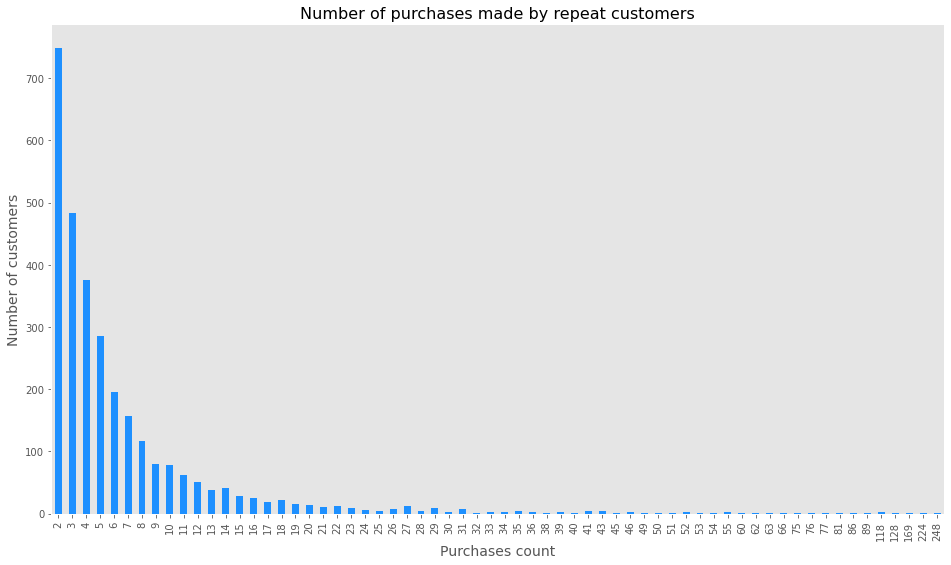

In [48]:
# Let's look at the number of purchases
ax = df_summary.groupby('invoiceno_nunique').count()['revenue_sum'].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(16,9), 
        grid=False)
plt.xlabel('Purchases count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

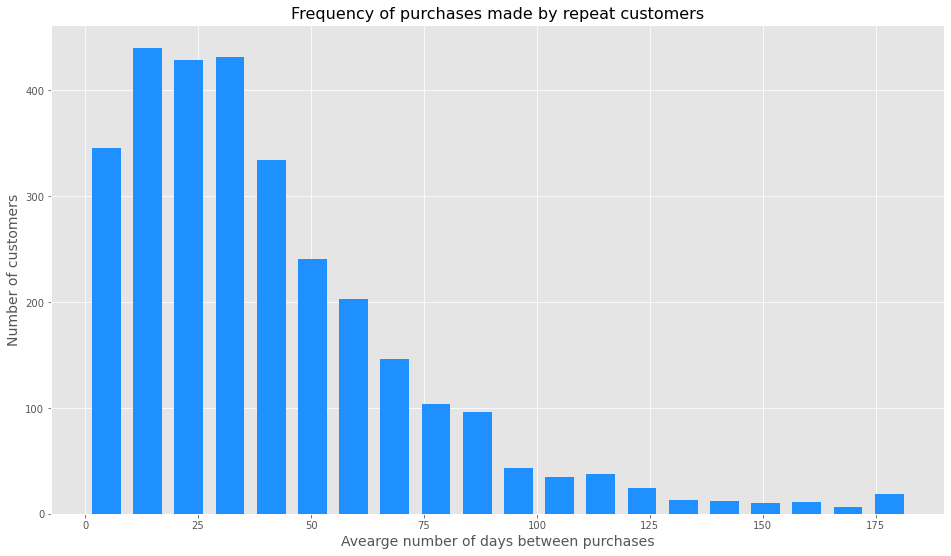

In [49]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(16,9),
        grid=True)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16);

In [56]:
df_summary['invoicedate_purchase_frequency'].describe()

count   2,980.00
mean       40.85
std        32.18
min         0.12
25%        17.50
50%        33.54
75%        55.50
max       182.50
Name: invoicedate_purchase_frequency, dtype: float64

<AxesSubplot:xlabel='invoicedate_purchase_frequency'>

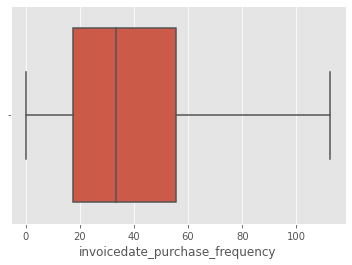

In [54]:
# lets plot a boxplot without statistical outliers
sns.boxplot(df_summary['invoicedate_purchase_frequency'], showfliers = False)

## Step 3: Calculate Customer Metrics

The dataset with which we are working consists of raw transactional history.  To apply the BTYD models, we need to derive several per-customer metrics:</p>

* **Frequency** - the number of dates on which a customer made a purchase subsequent to the date of the customer's first purchase
* **Age (T)** - the number of time units, *e.g.* days, since the date of a customer's first purchase to the current date (or last date in the dataset)
* **Recency** - the age of the customer (as previously defined) at the time of their last purchase

It's important to note that when calculating metrics such as customer age that we need to consider when our dataset terminates.  Calculating these metrics relative to today's date can lead to erroneous results.  Given this, we will identify the last date in the dataset and define that as *today's date* for all calculations.

To get started with these calculations, let's take a look at how they are performed using the built-in functionality of the lifetimes library:

In [28]:
# set the last transaction date as the end point for this historical dataset
current_date = df['InvoiceDate'].max()

# calculate the required customer metrics
metrics_pd = (
  lifetimes.utils.summary_data_from_transaction_data(
    df,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D'
    )
  )

# display first few rows
metrics_pd.head(10)

,frequency,recency,T
CustomerID,,,
"12,346.00",0.00,0.00,325.00
"12,347.00",6.00,365.00,367.00
"12,348.00",3.00,283.00,358.00
"12,349.00",0.00,0.00,18.00
"12,350.00",0.00,0.00,310.00
"12,352.00",6.00,260.00,296.00
"12,353.00",0.00,0.00,204.00
"12,354.00",0.00,0.00,232.00
"12,355.00",0.00,0.00,214.00


In [29]:
# summary data from lifetimes
metrics_pd.describe()

,frequency,recency,T
count,"4,372.00","4,372.00","4,372.00"
mean,3.41,133.72,225.30
std,6.67,133.00,118.38
min,0.00,0.00,0.00
25%,0.00,0.00,115.00
50%,1.00,98.00,253.00
75%,4.00,256.00,331.00
max,145.00,373.00,373.00


### Calculate holdout periods
The metrics we've calculated represent summaries of a time series of data.  To support model validation and avoid overfitting, a common pattern with time series data is to train models on an earlier portion of the time series (known as the *calibration* period) and validate against a later portion of the time series (known as the *holdout* period). In the lifetimes library, the derivation of per customer metrics using calibration and holdout periods is done through a simple method call.  Because our dataset consists of a limited range for data, we will instruct this library method to use the last 90-days of data as the holdout period.

In [30]:
from datetime import timedelta

# set the last transaction date as the end point for this historical dataset
current_date = df['InvoiceDate'].max()

# define end of calibration period
holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)

# calculate the required customer metrics
metrics_cal_pd = (
  lifetimes.utils.calibration_and_holdout_data(
    df,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D'    
    )
  )

# display first few rows
metrics_cal_pd.head(10)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
"12,346.00",0.00,0.00,235.00,0.00,90.00
"12,347.00",4.00,238.00,277.00,2.00,90.00
"12,348.00",2.00,110.00,268.00,1.00,90.00
"12,350.00",0.00,0.00,220.00,0.00,90.00
"12,352.00",3.00,34.00,206.00,3.00,90.00
"12,353.00",0.00,0.00,114.00,0.00,90.00
"12,354.00",0.00,0.00,142.00,0.00,90.00
"12,355.00",0.00,0.00,124.00,0.00,90.00
"12,356.00",1.00,80.00,235.00,1.00,90.00


In [ ]:
# remove customers with no repeats (complete dataset)
filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]

## remove customers with no repeats in calibration period
filtered_cal_pd = metrics_cal_pd[metrics_cal_pd['frequency_cal'] > 0]

## Step 4: Train the Model

To ease into the training of a model, let's start with a simple exercise using a [Pareto/NBD model](https://www.jstor.org/stable/2631608), the original BTYD model. We'll use the calibration-holdout dataset constructed in the last section of this notebook, fitting the model to the calibration data and later evaluating it using the holdout data:

In [ ]:
from lifetimes.fitters.pareto_nbd_fitter import ParetoNBDFitter
from lifetimes.fitters.beta_geo_fitter import BetaGeoFitter

# Copy the data into new dataframe
input_pd = filtered_cal_pd.copy()

# fit a model
model = ParetoNBDFitter(penalizer_coef=0.0)
model.fit( input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])

With our model now fit, let's make some predictions for the holdout period.  We'll grab the actuals for that same period to enable comparison in a subsequent step:

In [ ]:
# get predicted frequency during holdout period
frequency_holdout_predicted = model.predict(
    input_pd['duration_holdout'], 
    input_pd['frequency_cal'], 
    input_pd['recency_cal'], 
    input_pd['T_cal']
)

# get actual frequency during holdout period
frequency_holdout_actual = input_pd['frequency_holdout']

With actual and predicted values in hand, we can calculate some standard evaluation metrics.  Let's wrap those calculations in a function call to make evaluation easier in future steps.

In [ ]:
import numpy as np

def score_model(actuals, predicted, metric='mse'):
    # make sure metric name is lower case
    metric = metric.lower()
  
    # Mean Squared Error and Root Mean Squared Error
    if metric=='mse' or metric=='rmse':
        val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
        if metric=='rmse':
            val = np.sqrt(val)
  
    # Mean Absolute Error
    elif metric=='mae':
        np.sum(np.abs(actuals-predicted))/actuals.shape[0]
  
    else:
        val = None
        
    return val

In [ ]:
# score the model
print('MSE: {0}'.format(score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')))

While the internals of the Pareto/NBD model may be quite complex.  In a nutshell, the model calculates a double integral of two curves, one which describes the frequency of customer purchases within a population and another which describes customer survivorship following a prior purchase event. All of the calculation logic is thankfully hidden behind a simple method call.

As simple as training a model may be, we have two models that we could use here: the Pareto/NBD model and the BG/NBD model.  The [BG/NBD model](http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf) simplifies the math involved in calculating customer lifetime and is the model that popularized the BTYD approach.  Both models work off the same customer features and employ the same constraints.  (The primary difference between the two models is that the BG/NBD model maps the survivorship curve to a beta-geometric distribution instead of a Pareto distribution.) To achieve the best fit possible, it is worthwhile to compare the results of both models with our dataset.

Each model leverages an L2-norm regularization parameter which we've arbitrarily set to 0 in the previous training cycle.  In addition to exploring which model works best, we should consider which value (between 0 and 1) works best for this parameter.  This gives us a pretty broad search space to explore with some hyperparameter tuning.

To assist us with this, we will make use of [hyperopt](http://hyperopt.github.io/hyperopt/).  Hyperopt allows us to parallelize the training and evaluation of models against a hyperparameter search space.  This can be done leveraging the multiprocessor resources of a single machine or across the broader resources provided by a Spark cluster.  With each model iteration, a loss function is calculated.  Using various optimization algorithms, hyperopt navigates the search space to locate the best available combination of parameter settings to minimize the value returned by the loss function.

To make use of hyperopt, lets define our search space and re-write our model training and evaluation logic to provide a single function call which will return a loss function measure:

## Step 5: Evaluate the Model

Using a method defined in the last section of this notebook, we can calculate the MSE for our newly trained model: